/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_202639/1728202248.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modality_pairs, y=correlation_values, palette="coolwarm")


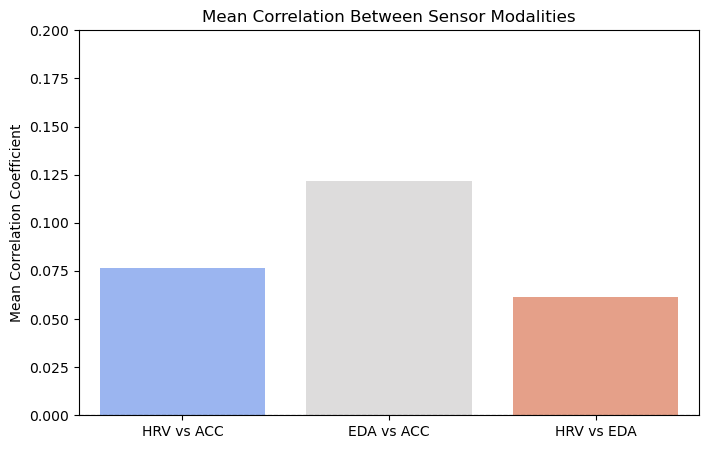

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
file_path = "processed_dataset_with_clusters.csv"
df = pd.read_csv(file_path)

# Separate features and target variables
feature_columns = df.columns[:-5]  # Excluding the last 5 columns (target variables)
target_columns = df.columns[-5:]   # Last 5 columns are target variables
features = df[feature_columns]

# Normalize features using StandardScaler (Z-score normalization)
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)
df_normalized = pd.DataFrame(normalized_features, columns=feature_columns)

# Define sensor modalities
modalities = {
    "HRV": [col for col in feature_columns if "hrv" in col],
    "ACC": [col for col in feature_columns if "acc" in col],
    "EDA": [col for col in feature_columns if "eda" in col]
}

# Compute cross-modality correlations
hrv_features = modalities["HRV"]
acc_features = modalities["ACC"]
eda_features = modalities["EDA"]

df_modality = df_normalized[sum(modalities.values(), [])]

# Compute mean absolute correlation between different modalities
hrv_acc_corr = df_modality[hrv_features].corrwith(df_modality[acc_features].mean(axis=1)).mean()
eda_acc_corr = df_modality[eda_features].corrwith(df_modality[acc_features].mean(axis=1)).mean()
hrv_eda_corr = df_modality[hrv_features].corrwith(df_modality[eda_features].mean(axis=1)).mean()

# Visualization of modality correlation
modality_pairs = ["HRV vs ACC", "EDA vs ACC", "HRV vs EDA"]
correlation_values = [hrv_acc_corr, eda_acc_corr, hrv_eda_corr]

plt.figure(figsize=(8, 5))
sns.barplot(x=modality_pairs, y=correlation_values, palette="coolwarm")
plt.title("Mean Correlation Between Sensor Modalities")
plt.ylabel("Mean Correlation Coefficient")
plt.ylim(0, 0.2)  # Keeping scale to highlight small differences
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.show()
